### Overview

This dataset contains information about flowers called an iris.  I will use K-Means clustering to atttempt to identify unique types of irises.
- **Step 1:**  Identify the optimal value of k by inspecting the crux of the 'elbow'
- **Step 2:**  Utilize K-Means clustering to separate datapoints into distinct groups
- **Step 3:**  Visually evalute 3-D projections of the groupings to measure fit
<br/><br/>


### Import

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
df = pd.DataFrame(X)
df.columns = iris.feature_names


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Identifying K

In [4]:
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

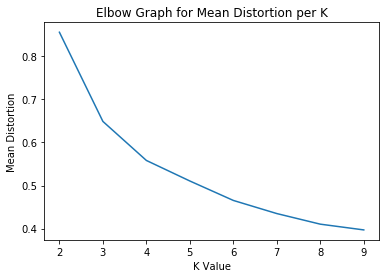

In [9]:
find_k(X, range(2,10))

<a href="https://en.wikipedia.org/wiki/Iris_(plant)#Taxonomy">Wikipedia's entry on Iris taxonomy</a> shows there are 6 subgenera.  There is no elbow at k=6, but I will try k=4 first as this most closely supports my background knowledge.

### Data Prep

In [11]:
# Scale data
scaler  = StandardScaler()
X_scaled =  scaler.fit_transform(X)

### Training

In [12]:
# Train model
k4_model = KMeans(n_clusters=4, random_state=42)
k4_model.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [13]:
df['labels'] = k4_model.labels_

In [28]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,3
5,5.4,3.9,1.7,0.4,3
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [29]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
140,6.7,3.1,5.6,2.4,0
141,6.9,3.1,5.1,2.3,0
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,0
144,6.7,3.3,5.7,2.5,0
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0
149,5.9,3.0,5.1,1.8,2


### Evaluation

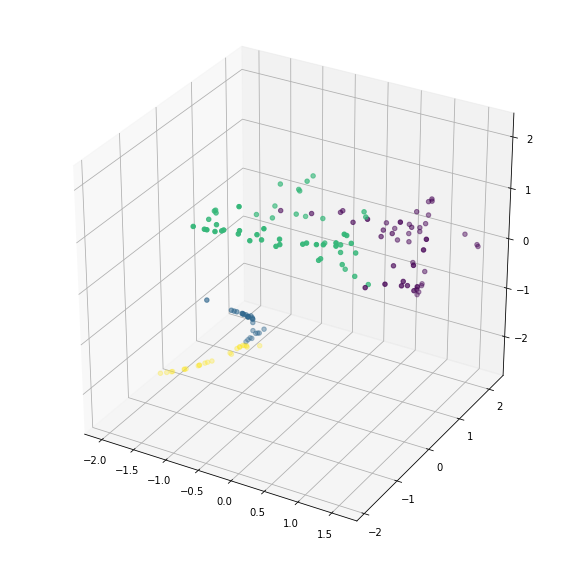

In [24]:
# Plot groups
model4 = TSNE(n_components=3, learning_rate=4, random_state=42)
X_tsne_k4 = model4.fit_transform(X_scaled)
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne_k4[:,0], X_tsne_k4[:,1], X_tsne_k4[:,2], c=k4_model.labels_)

There are definitely distinct groups; however, there is overlap between the blue and yellow groups and the green and purple groups.  With k=3, these groups may cleanly resolve into a 'southwest' group, a 'northcentral' group, and a 'northeast' group.

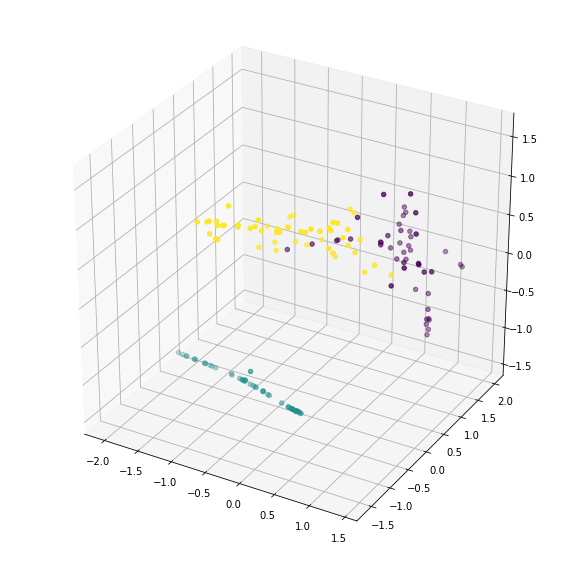

In [25]:
# k=3

# Train model
k3_model = KMeans(n_clusters=3, random_state=42)
k3_model.fit(X_scaled)

# Plot groups
model3 = TSNE(n_components=3, learning_rate=3, random_state=42)
X_tsne_k3 = model3.fit_transform(X_scaled)
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne_k3[:,0], X_tsne_k3[:,1], X_tsne_k3[:,2], c=k3_model.labels_)

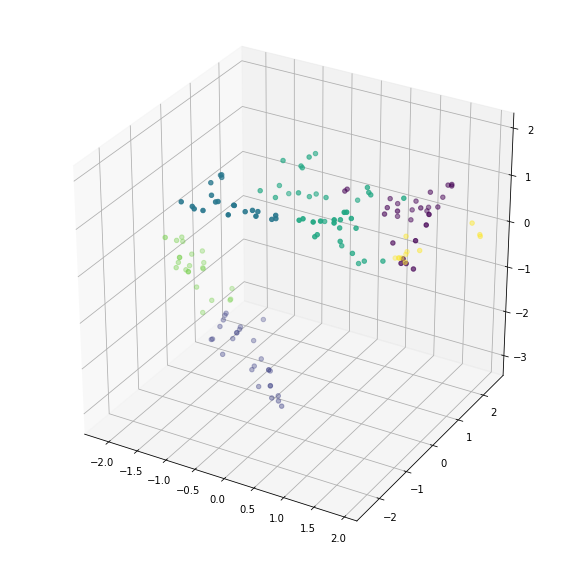

In [26]:
# k=6

# Train model
k6_model = KMeans(n_clusters=6, random_state=42)
k6_model.fit(X_scaled)

# Plot groups
model6 = TSNE(n_components=3, learning_rate=6, random_state=42)
X_tsne_k6 = model6.fit_transform(X_scaled)
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne_k6[:,0], X_tsne_k6[:,1], X_tsne_k6[:,2], c=k6_model.labels_)

### Summary

I think there is some support for the the k=6 hypothesis based on the number of subgenera specified on the Wikipedia entry. The there is some overlap between the purple and yellow groups, however.  The cleanest breakdown, in my opinion, is k=3.  It appears there are 3 very well-defined groups in the southwest, northcentral, and northeast sections of the 3d diagram.